In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate as interp
from scipy import stats 
import warnings; warnings.simplefilter('ignore')


PROBLEM ONE

a)

The first terms of the Taylor expansion at each 4 points are:

$f(x+\delta) = f(x) + f'(x)\delta + \frac{1}{2}f''(x)\delta^2 + \frac{1}{6}f'''(x)\delta^3 + \frac{1}{24}f''''(x)\delta^4 + \frac{1}{120}f'''''(x)\delta^5\ +\ ... $

$f(x-\delta) = f(x) - f'(x)\delta + \frac{1}{2}f''(x)\delta^2 - \frac{1}{6}f'''(x)\delta^3 + \frac{1}{24}f''''(x)\delta^4 - \frac{1}{120}f'''''(x)\delta^5\ +\ ... $

$f(x+2\delta) = f(x) + f'(x)\delta + 2f''(x)\delta^2 + \frac{8}{6}f'''(x)\delta^3 + \frac{16}{24}f''''(x)\delta^4 + \frac{32}{120}f'''''(x)\delta^5\ +\ ... $

$f(x-2\delta) = f(x) - f'(x)\delta + 2f''(x)\delta^2 - \frac{8}{6}f'''(x)\delta^3 + \frac{16}{24}f''''(x)\delta^4 -[ \frac{32}{120}f'''''(x)\delta^5\ +\ ... $

<br>
<br>

Now, by substracting $f(x+\delta)$ and $f(x-\delta)$, the even terms cancel out such that,

$\frac{f(x+\delta) - f(x-\delta)}{2\delta} \approx f'(x) + \frac{1}{6}f'''(x)\delta^2 + \frac{1}{120}f'''''(x)\delta^4 \ + \ ...$ (1)

Similarly, by substracting $f(x+2\delta)$ and $f(x-2\delta)$, the even terms cancel out such that,

$\frac{f(x+2\delta) - f(x-2\delta)}{4\delta} \approx 3f'(x) + \frac{2}{3}f'''(x)\delta^2 + \frac{32}{120}f'''''(x)\delta^4 \ + \ ...$ (2)

<br>
<br>

We can cancel the third derivative term of the Taylor series by substracting 4*(1) from (2), such that

$\frac{f(x+2\delta) - f(x-2\delta)}{4\delta} - 4\frac{f(x+\delta) - f(x-\delta)}{2\delta} = -3f'(x) + \frac{7}{30}f'''''(x)\delta^4 \ + \ ... $

With a truncation error $~\delta^4f^5(x)$, we obtain the following numerical approximation for $f'(x)$,

$f'(x) \approx \frac{8[f(x+\delta) - f(x-\delta)] - [f(x+2\delta) - f(x-2\delta)]}{12\delta}$

<br><br><br>


b)

The total error is the sum of the round-off and truncation error, which is $\approx \frac{f\epsilon}{\delta} + \delta^4f^5(x)$, where $\epsilon$ is the machine precision (here $10^{-16}$).

Set it equal to zero and differentiate with respect to $\delta$: 

$\frac{f\epsilon}{\delta^2} + 4\delta^3f^5(x) = 0 \iff$
$-f\epsilon + 4\delta^5f^5(x)=0$ <br> $\iff \delta \approx (\epsilon\frac{f}{f^5})^{1/5}$

The best estimated of dx for f(x)=exp[x] is ~0.0006 and for f(x)=exp[0.01x], ~0.06


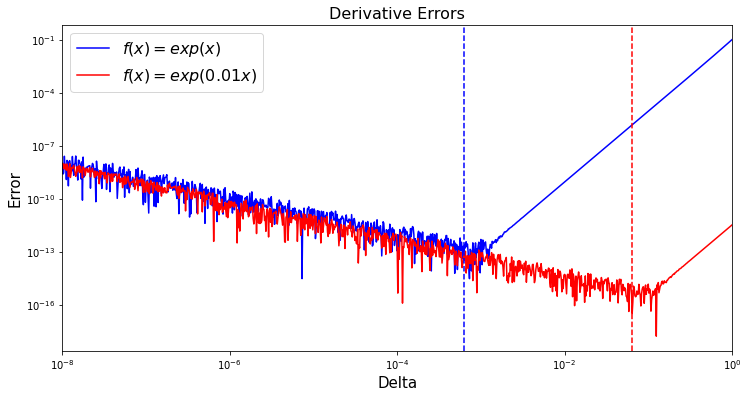

In [54]:
#This code is inspired from John's "num_derivs_clean.py"

logdx=np.linspace(-8,0,1001)
dx=10**logdx #dx's range from 1e-8 to 1

fun=np.exp 
x0=1 #the function is evaluated at x=1

#The four points where the function is evaluated
y1=fun(x0+dx)
y2=fun(x0-dx)
y3=fun(x0+2*dx)
y4=fun(x0-2*dx)

#Similarly, the four points evaluated for f(x) = exp[0.01x]
y11=fun((x0+dx)/100)
y22=fun((x0-dx)/100)
y33=fun((x0+2*dx)/100)
y44=fun((x0-2*dx)/100)

#The returned numerical derivatives
d1=1/(12*dx)*(8*(y1-y2)-(y3-y4))      #for f(x) = exp[x]
d2=1/(12*dx)*(8*(y11-y22)-(y33-y44))  #for f(x) = exp[0.01x]

#Compute the best dx estimation
def est_dx(ratio,n):
    return (1e-16*ratio)**n

n=1/5
ratio1=1
ratio2=1e10

dx1=est_dx(ratio1,n)
dx2=est_dx(ratio2,n)
print('The best estimated of dx for f(x)=exp[x] is ~{} and for f(x)=exp[0.01x], ~{}'.format(round(dx1,4),round(dx2,2)))

#Plot the Figure
fig = plt.subplots(1,figsize=(12,6))
ax=plt.gca()
plt.loglog(dx,np.abs(d1-np.exp(x0)),label="$f(x) = exp(x)$",color = 'b')
plt.loglog(dx,np.abs(d2-1/100*np.exp(x0/100)),label="$f(x) = exp(0.01x)$",color = 'r')
plt.title('Derivative Errors',fontsize=16)
plt.xlabel('Delta',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.legend(loc=2, prop={'size': 16})
plt.axvline(x = err1, linestyle='--',color = 'b')
plt.axvline(x = err2, linestyle='--',color = 'r')
ax.set_xlim(1e-8,1)
plt.show()

[500.   490.   480.   470.   460.   450.   440.   430.   420.   410.
 400.   390.   380.   370.   360.   350.   340.   330.   320.   310.
 300.   290.   280.   273.   270.   260.   250.   240.   230.   220.
 210.   200.   190.   180.   170.   160.   150.   140.   130.   120.
 110.   100.    90.    85.    80.    77.35  75.    70.    65.    60.
  58.    56.    54.    52.    50.    48.    46.    44.    42.    40.
  39.    38.    37.    36.    35.    34.    33.    32.    31.    30.
  29.    28.    27.    26.    25.    24.    23.    22.    21.    20.
  19.5   19.    18.5   18.    17.5   17.    16.5   16.    15.5   15.
  14.5   14.    13.5   13.    12.5   12.    11.5   11.    10.5   10.
   9.5    9.     8.5    8.     7.5    7.     6.5    6.     5.8    5.6
   5.4    5.2    5.     4.8    4.6    4.4    4.2    4.     3.9    3.8
   3.7    3.6    3.5    3.4    3.3    3.2    3.1    3.     2.9    2.8
   2.7    2.6    2.5    2.4    2.3    2.2    2.1    2.     1.9    1.8
   1.7    1.6    1.5    1.4 ]


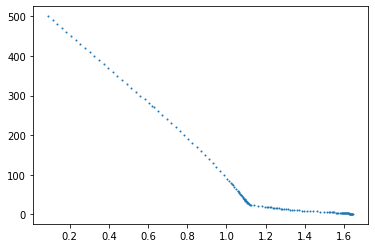

In [3]:
data = np.loadtxt("../../phys512-2022/problem_sets/lakeshore.txt")
voltages = np.flip(data[:,1])
temperatures = np.flip(data[:,0])

plt.plot(voltages,temperatures,'o',markersize=1)

print(temperatures)

In [65]:
#Linear Fit
def linear_eval(x,y,point):
   
    myfun=interp.interp1d(x,y,'linear')
    return myfun(point)

#Polynomial Fit
def poly_eval(x_data,y_data,n,point):
    
    pp=np.polyfit(x_data,y_data,n)
    return np.polyval(pp,point)

#Rational Fit
def rat_return(p,q,x):
    
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_eval(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    
    print(np.linalg.pinv(mat))
        
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    
    
    print(p,q)
    return rat_return(p,q,point)

def rat_eval2(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
        
    print(np.linalg.inv(mat))
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    
    print(p,q)
    return rat_return(p,q,point)

#Cubic Spline fit
def cubspline_eval(x,y,point):
    
    spln=interp.splrep(x,y)
    return interp.splev(point,spln)
    

    

After having tested the fits, where the cubic spline is clearly the most appropriate evaluation fit. We investigate the errors from the observerd data

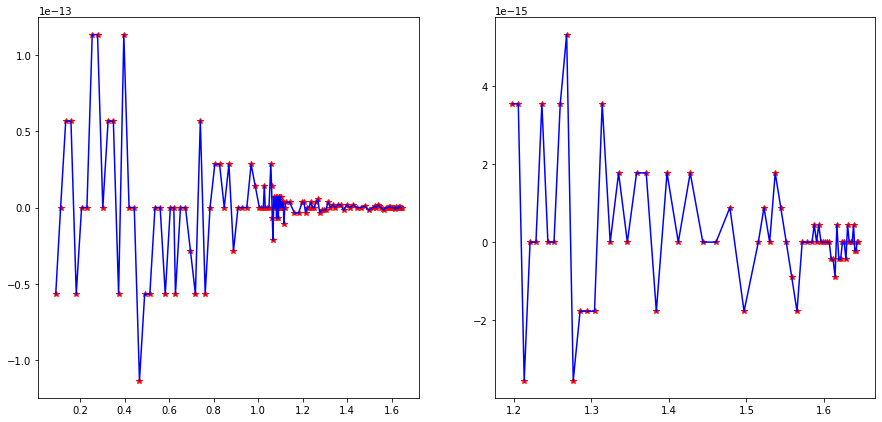

In [5]:
temp_pred=np.array([cubspline_eval(voltages,temperatures,x) for x in voltages])
#It seems like the errors in the interval [1.2,1.7] are smaller.
fig,axs = plt.subplots(1,2,figsize=[15,7])
axs[0].plot(voltages,temperatures-temp_pred,'r*')
axs[0].plot(voltages,temperatures-temp_pred,'b-')

myind=np.argmin(np.abs(1.2-voltages))
axs[1].plot(voltages[myind:],temperatures[myind:]-temp_pred[myind:],'r*')
axs[1].plot(voltages[myind:],temperatures[myind:]-temp_pred[myind:],'b-')

We could try to fit a polynomial to the errors

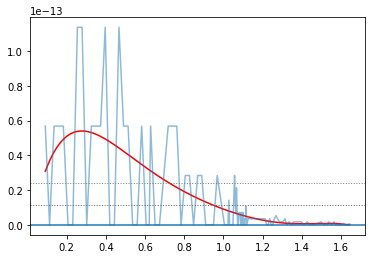

In [6]:
errors=np.abs(temperatures-temp_pred)
x = np.linspace(voltages[0],voltages[-1],1001)
errors_fit = [poly_eval(voltages,errors,6,point) for point in x]



plt.plot(x,np.abs(errors_fit),'r-')
plt.plot(voltages,np.abs(temperatures-temp_pred),'-',alpha=0.5)
plt.axhline(np.std(errors),color='gray',linestyle='dotted', linewidth=1)
plt.axhline(np.mean(errors),color='dimgrey',linestyle='dotted', linewidth=1)
plt.axhline(0)


I will use this polynomial fit to estimate a rough error. While this fit has intrinsic errors as well, I prefer to use this than simply average the errors, because it seems like cubic spline fit of the lakeshore data is more accurate in the tail. I will also round the returned estimated error to the nearest power of 10 to not assume precise error evaluation.

In [7]:
def lakeshore(V,data):
 
    temps = np.flip(data[:,0])
    volts = np.flip(data[:,1])
    
    #First, use the cubic spline fit
    spln=interp.splrep(volts,temps)
    
    #Now evaluate error estimate
    temps_pred = interp.splev(volts,spln)
    errors = np.abs(temps-temps_pred) #Take the absolute value because we don't want to have zeros in the polyfit
    #sems = 10**(np.round(np.log10(stats.sem(errors))))
    stds = 10**np.round(np.log10((np.std(errors))))
    
    return [np.array(interp.splev(V,spln)),stds]

                


In [8]:
def lakeshore2(V,data):
 
    temps = np.flip(data[:,0])
    volts = np.flip(data[:,1])
    
    #First, use the cubic spline fit
    spln=interp.splrep(volts,temps)
    
    #Now construct the polyfit for the error estimate
    temps_pred = interp.splev(volts,spln)
    errors = np.abs(temps-temps_pred) #Take the absolute value because we don't want to have zeros in the polyfit
    pp=np.polyfit(voltages,errors,10)
    
    #Then the interpolated temperature and estimated error can be returned

    try:
        if len(V)>0:
            temps_interp = np.array(interp.splev(V,spln))

            errs = 0*temps_interp
            for i in range(len(temps_interp)):
                errs[i] = 10**np.round(np.log10(np.abs(np.polyval(pp,V[i]))))

                if errs[i]<=10**(-16):
                    errs[i] = 10**(-15)
        return [temps_interp,errs]
    except:
        None
 
        
    err = 10**np.ceil(np.log10(np.round(np.polyval(pp,V))))
    if err <= 10**(-16):
        err = 10**(-15)
   
    return [interp.splev(V,spln), err]
                


In [9]:
test1=lakeshore(np.linspace(voltages[0],voltages[-1],100),data)
test2=lakeshore2(np.linspace(voltages[0],voltages[-1],100),data)


PROBLEM 4

[ 1.00000000e+00  9.48138686e-17 -4.05284735e-01] [4.00293982e-16 9.83385665e-02]


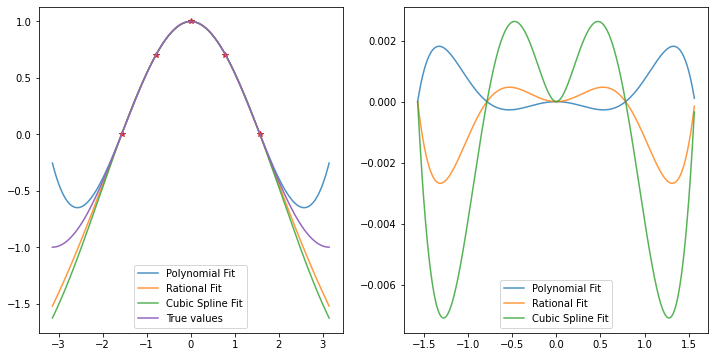

In [10]:
#Polynomial, cubic spline and rational interpolations are already defined above
n=3;m=3
x_points = np.linspace(-np.pi/2,np.pi/2,n+m-1)
y_points = np.cos(x_points)
x_fits = np.linspace(-np.pi,np.pi,1001)
ind1 = np.where(x_fits==-np.pi/2)[0][0]
ind2 = np.where(x_fits==np.pi/2)[0][0]
y_true = np.cos(x_fits[ind1:ind2])

#Polynomial Fit
y_poly = poly_eval(x_points,y_points,n+m-1,x_fits)

#Rational Fit
y_rat = rat_eval(x_points,y_points,n,m,x_fits)

#Cubic Spline Fit
y_cubspln = cubspline_eval(x_points,y_points,x_fits)

fig,axs=plt.subplots(1,2,figsize=[12,6])
axs[0].plot(x_fits,y_poly,label='Polynomial Fit',alpha=0.8)
axs[0].plot(x_fits,y_rat,label='Rational Fit',alpha=0.8)
axs[0].plot(x_fits,y_cubspln,label='Cubic Spline Fit',alpha=0.8)
axs[0].plot(x_points,y_points,'*')
axs[0].plot(x_fits,np.cos(x_fits),label='True values')
axs[0].legend()

axs[1].plot(x_fits[ind1:ind2],y_true-y_poly[ind1:ind2],label='Polynomial Fit',alpha=0.8)
axs[1].plot(x_fits[ind1:ind2],y_true-y_rat[ind1:ind2],label='Rational Fit',alpha=0.8)
axs[1].plot(x_fits[ind1:ind2],y_true-y_cubspln[ind1:ind2],label='Cubic Spline Fit',alpha=0.8)
axs[1].legend()








Trying with the Lorentzian now

[ 1.00000000e+00  7.77156117e-16 -1.55431223e-15] [1.22124533e-15 1.00000000e+00]


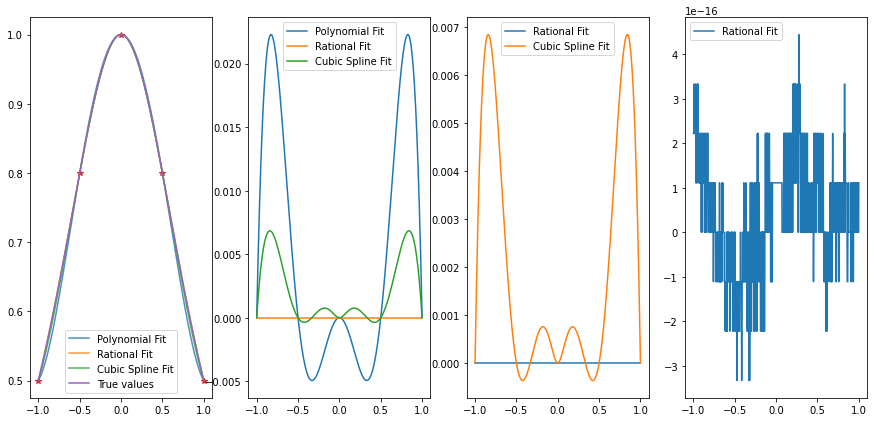

In [11]:
def lorentz(x):
    return 1/(1+x**2)

n=3;m=3
x_points = np.linspace(-1,1,n+m-1)
y_points = np.array([lorentz(x) for x in x_points])
x_fits = np.linspace(-1,1,1001)
y_true = np.array([lorentz(x) for x in x_fits])

#Polynomial Fit
y_poly = poly_eval(x_points,y_points,n+m-1,x_fits)

#Rational Fit
y_rat = rat_eval(x_points,y_points,n,m,x_fits)

#Cubic Spline Fit
y_cubspln = cubspline_eval(x_points,y_points,x_fits)


fig,axs = plt.subplots(1,4,figsize=[15,7])
axs[0].plot(x_fits,y_poly,label='Polynomial Fit',alpha=0.8)
axs[0].plot(x_fits,y_rat,label='Rational Fit',alpha=0.8)
axs[0].plot(x_fits,y_cubspln,label='Cubic Spline Fit',alpha=0.8)
axs[0].plot(x_points,y_points,'*')
axs[0].plot(x_fits,[lorentz(x) for x in x_fits],label='True values')
axs[0].legend()

axs[1].plot(x_fits,y_true-y_poly,'-',label='Polynomial Fit')
axs[1].plot(x_fits,y_true-y_rat,'-',label='Rational Fit')
axs[1].plot(x_fits,y_true-y_cubspln,'-',label='Cubic Spline Fit')
axs[1].legend()

axs[2].plot(x_fits,y_true-y_rat,'-',label='Rational Fit')
axs[2].plot(x_fits,y_true-y_cubspln,'-',label='Cubic Spline Fit')
axs[2].legend()

axs[3].plot(x_fits,y_true-y_rat,'-',label='Rational Fit')
axs[3].legend()



[[-0.125  0.625  0.625 -0.125]
 [-0.125  1.875 -1.875  0.125]
 [-1.25   1.25   1.25  -1.25 ]
 [ 1.125 -1.875  1.875 -1.125]]
[1.] [ 2.22044605e-16  1.00000000e+00 -4.44089210e-16]
[[-0.125  0.625  0.625 -0.125]
 [-0.125  1.875 -1.875  0.125]
 [-1.25   1.25   1.25  -1.25 ]
 [ 1.125 -1.875  1.875 -1.125]]
[1.] [0.0000000e+00 1.0000000e+00 4.4408921e-16]


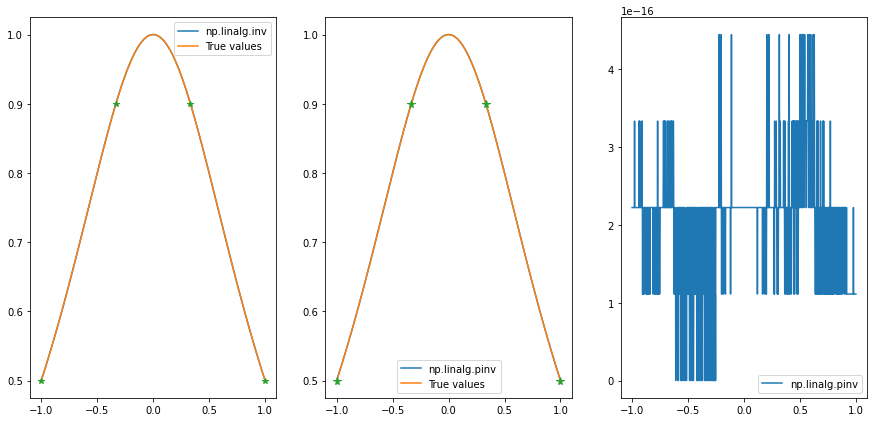

In [71]:
n=1;m=4
x_points = np.linspace(-1,1,n+m-1)
y_points = np.array([lorentz(x) for x in x_points])
x_fits = np.linspace(-1,1,1001)
y_true = np.array([lorentz(x) for x in x_fits])


#Rational fit with np.linalg.pinv
y_rat1 = rat_eval(x_points,y_points,n,m,x_fits)

#Rational fit with np.linalg.inv
y_rat2 = rat_eval2(x_points,y_points,n,m,x_fits)

fig,axs = plt.subplots(1,3,figsize=[15,7])

axs[0].plot(x_fits,y_rat2,label='np.linalg.inv')
axs[0].plot(x_fits,y_true,label='True values')
axs[0].plot(x_points,y_points,'*')
axs[0].legend()

axs[1].plot(x_fits,y_rat1,label='np.linalg.pinv')
axs[1].plot(x_fits,y_true,'-',label='True values')
axs[1].plot(x_points,y_points,'*',markersize=8,zorder=3)
axs[1].legend()


axs[2].plot(x_fits,y_true - y_rat1,'-',label='np.linalg.pinv')
axs[2].legend()



We would expect the interpolation to replicate the lorentzian ($\frac{1}{1+x^2}$) "exactly" (with machine error (i.e. $10^{-16}$) since the function is also a rational function. However, we observe that the rational interpolation with np.linalg.inv goes crazy when the order of the denominator (m) is greater than 3 and the order of the numerator (n) is greater than 1. This is due to exceeding terms in the rational $R(x)\ $ (i.e. polynomial of degree higher than 2 (m>3) in the denominator and higher than 0 (n>1) in the numerator. In this case, $R(x)$ can be written as $R(x) = \frac{p(x)(1+ax)(1+bx)...(1+cx)}{(1+qq(x))(1+ax)(1+bx)...(1+cx)}$, where each factor $(1+\lambda x)$ get cancel for $R(x)$ to eventually simplify to a lorentzian (where the coefficients of the extra terms in the numerator or in the denominator (depending on n and m) are set to 0 by the interpolation). Then, when the inverse of the matrix is taken to compute the coefficients of p(x) and q(x), the cancelling factors will yield values resulting in "interpolation craziness", which is what happens when np.linalg.inv is used to invert the matrix. On the other hand, np.linalg.pinv returns the pseudo inverse by using its singular-value decomposition. This way, the rational will give an accurate interpolation of the Lorentzian, by accounting for the unexpected results that occur due to the cancelling factors. 

In a few words, the condition for the rational interpolation with np.linalg.pinv to fail is to have at least one cancelling factor (which occurs if m>3 and n>1). 